### PCA 개요 

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)
## target은 지난 번 세션에서 배운 것처럼 0, 1 등으로 분류하는 항목.

sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0

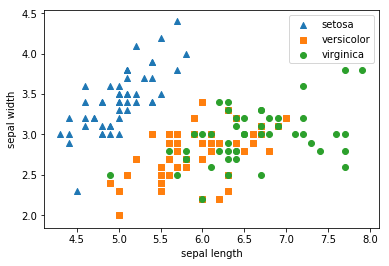

In [2]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    ##enumerate는 주어진 argument를 인덱스화할 수 있음. 말 그대로 숫자로 만들어 사용하게 되므로 i는 0, 1, 2.
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    ##따라서 여길 거치고 나면 target이 0,1,2 중에 무엇이냐에 따라 x,y에 해당 종류의 마커를 선택해 마킹하게 됨.
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)
## 표준 정규화를 거치게 됨.

In [4]:
from sklearn.decomposition import PCA

pca = PCA().fit(iris_scaled)
np.cumsum(pca.explained_variance_ratio_)
## 차원 축소

array([0.76740358, 0.95023085, 0.98747608, 0.9958933 , 1.        ])

In [5]:


pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)
## 차원 축소한 결과를 다시 시각화해보기 위한 과정이라고 이해함.

(150, 2)


In [8]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)
## 아까와 같은 과정을 PCA를 거친 데이터로 진행

pca_component_1  pca_component_2  target
0        -2.576120         0.474499       0
1        -2.415322        -0.678092       0
2        -2.659333        -0.348282       0

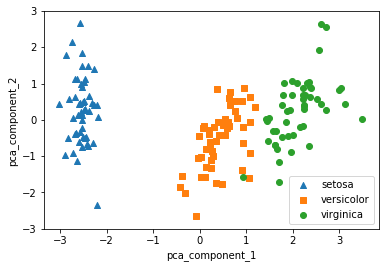

In [9]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()
## 시각화 결과 더 분산되어 있을 수밖에 없음. 가장 잘 분류해주는 새로운 기준에 따라 나눈 것이니까.

In [10]:
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print(scores)
##지난 시간에 배운 RF 모델로 검증. 성능 측정.

[0.98039216 0.94117647 0.97916667]


In [16]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print(scores_pca)

[0.98039216 0.96078431 1.        ]
